In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
%matplotlib inline

In [2]:
pd.options.display.max_rows = 100

In [3]:
fires_2017 = pd.read_csv("forest_fires_1.csv")

In [4]:
fires_2017.drop(fires_2017.index[[43, 49, 50, 51]], inplace=True)

In [5]:
fires_2017

,Country,Current year,Average in the period,Country size
0,Andorra [AD],0,0,45221
1,Albania [AL],25041,14979,2876203
2,Austria [AT],699,1885,8380920
3,Åland Islands [AX],0,0,149696
4,Bosnia and Herzegovina [BA],45724,19891,5107961
5,Belgium [BE],0,141,3066748
6,Bulgaria [BG],72006,103608,11164672
7,Belarus [BY],6230,40981,20645011
8,Switzerland [CH],49,121,4122785
9,Czechia [CZ],4379,1390,7868762


In [6]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
})

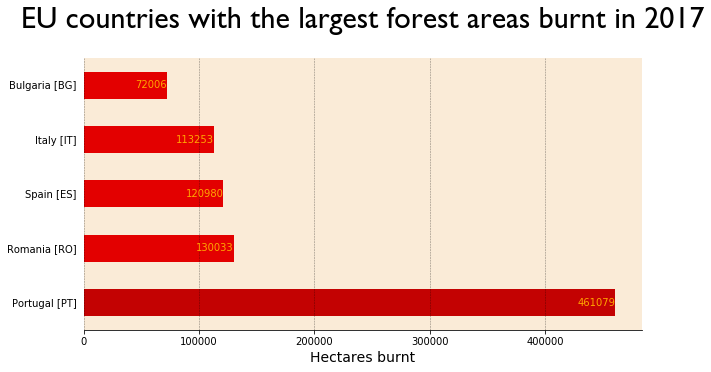

In [6]:
colours = ['#C30202', '#E30000', '#E30000', '#E30000', '#E30000']
ax = fires_2017.sort_values(by="Current year", ascending=False).head(5).plot(x='Country', y='Current year', kind='barh', color= colours, figsize=(10,5), legend=False)

for i, bar in enumerate(ax.patches):
    # print(i)
    value = str(int(round(bar.get_width())))
    x_pos = bar.get_width() - 1
    y_pos = i
    # ax.text(x_pos, y_pos, value, verticalalignment='center')
    ax.text(x_pos, y_pos, value, va='center', ha='right', color='orange')

ax.set_title ('EU countries with the largest forest areas burnt in 2017', pad = 30)
ax.legend().set_visible(False)
ax.title.set_fontsize(30)
ax.title.set_fontname('Gill Sans MT')

#plt.gcf().text(0.5, 0.92, "Hectares burnt, by country", ha='center', fontsize=15)

ax.set_xlabel("Hectares burnt", size=14)

ax.tick_params(which='major', left=False, bottom=False)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)

ax.tick_params(which='major', left=False, bottom=True, grid_alpha=0.5)
ax.set_facecolor('#faebd7')

ax.grid(True, axis='x', color='black', linestyle='--', lw=0.5, alpha=0.5)
ax.set_axisbelow(False)
#ax.set_xlim(0, 10)
ax.yaxis.label.set_visible(False)


plt.savefig("graph-bar-5-largest_areas_burnt.pdf", bbox_inches='tight')
plt.show()

In [7]:
#Alright, something's not right with Portugal... Let's take a look at the fire history of this country.

In [7]:
burned_areas_by_year = pd.read_csv("forest_fires_3_1.csv")

In [8]:
burned_areas_by_year.head()

,Burnt Area (ha),Portugal,Spain,France,Italy,Greece,Algeria,Austria,Bulgaria,Croatia,...,Lithuania,Morocco,Norway,Poland,Romania,Slovakia,Slovenia,Sweden,Switzerland,Turkey
0,1980,44251,263017.0,22176.0,143919.0,32965.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,662.0,NaN
1,1981,89798,298288.0,27711.0,229850.0,81417.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2186.0,NaN
2,1982,39556,152903.0,55145.0,130456.0,27372.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303.0,NaN
3,1983,47811,108100.0,53729.0,212678.0,19613.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,548.0,NaN
4,1984,52710,165119.0,27202.0,75272.0,33655.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,409.0,NaN


In [9]:
burned_areas_by_year.rename(columns={'Burnt Area (ha) ': 'Year'},
                            inplace=True)

In [10]:
burned_areas_by_year.head()

,Year,Portugal,Spain,France,Italy,Greece,Algeria,Austria,Bulgaria,Croatia,...,Lithuania,Morocco,Norway,Poland,Romania,Slovakia,Slovenia,Sweden,Switzerland,Turkey
0,1980,44251,263017.0,22176.0,143919.0,32965.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,662.0,NaN
1,1981,89798,298288.0,27711.0,229850.0,81417.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2186.0,NaN
2,1982,39556,152903.0,55145.0,130456.0,27372.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303.0,NaN
3,1983,47811,108100.0,53729.0,212678.0,19613.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,548.0,NaN
4,1984,52710,165119.0,27202.0,75272.0,33655.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,409.0,NaN


In [11]:
portugal_fire_hist_column_1= burned_areas_by_year['Portugal']

In [12]:
years_port = burned_areas_by_year['Year']

In [13]:
chronicle_of_portugal_burnt_areas  = pd.concat([years_port, portugal_fire_hist_column_1], axis = 1, sort=True, ignore_index=True)

In [14]:
chronicle_of_portugal_burnt_areas.tail()

,0,1
33,2013,152756
34,2014,19929
35,2015,64443
36,2016,161522
37,2017,461079


In [15]:
chronicle_of_portugal_burnt_areas.rename(columns={0: 'Year', 
                                                  1: 'Hectares burnt',
                                                             }, 
                                                   inplace=True)

In [16]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
})

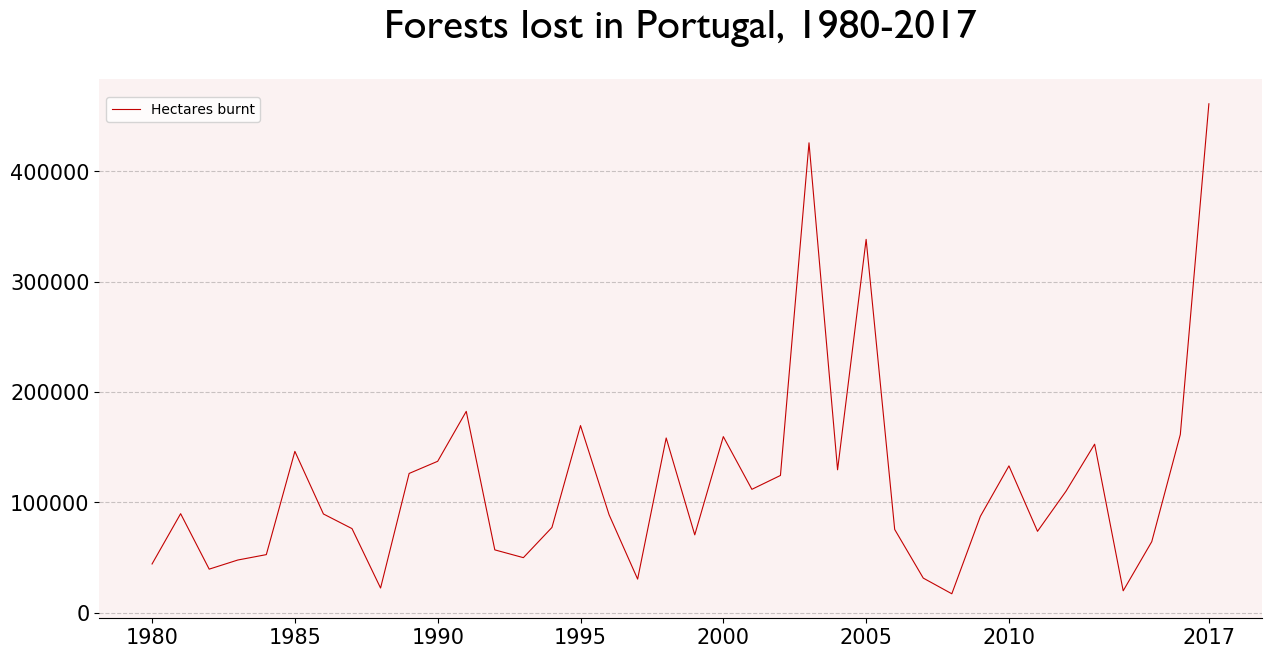

In [25]:
ax = chronicle_of_portugal_burnt_areas.plot(x='Year', y='Hectares burnt', color='#C30202', figsize=(15,7), linewidth=0.8)

ax.set_title ('Forests lost in Portugal, 1980-2017', pad = 30)
ax.legend().set_visible(False)
ax.title.set_fontsize(30)
ax.title.set_fontname('Gill Sans MT')

ax.set_facecolor('#FBF2F2')

plt.xticks(size = 15)
plt.yticks(size = 15)

ax.set_xlabel("")

ax.set_xticks([1980, 1985, 1990, 1995, 2000, 2005, 2010, 2017])

#plt.gcf().text(0.5, 0.91, "Hectares burnt", ha='center', fontsize=15)

ax.grid(False, axis='y')

plt.legend(bbox_to_anchor=(0, 0.98, 1., 0.), ncol=0.1,
           mode="normal")

ax.grid(True, axis='y', color='black', linestyle='--', lw=0.8, alpha=0.2)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
#ax.set_ylim(0, 461079)

plt.savefig("graph-line-portugal-burnt-hectares-per-year.pdf", bbox_inches='tight')
plt.show()

In [17]:
fires_by_year = pd.read_csv("forest_fires_2.csv")

In [18]:
fires_by_year.head()

,Number of fires,Portugal,Spain,France,Italy,Greece,Algeria,Austria,Bulgaria,Croatia,...,Lithuania,Morocco,Norway,Poland,Romania,Slovakia,Slovenia,Sweden,Switzerland,Turkey
0,1980,2349,7190,5040,11963,1207,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86,NaN
1,1981,6730,10878,5173,14503,1159,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152,NaN
2,1982,3626,6545,5308,9557,1045,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85,NaN
3,1983,4539,4791,4659,7956,968,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118,NaN
4,1984,7356,7203,5672,8482,1284,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,183,NaN


In [19]:
fires_by_year.rename(columns={'Number of fires': 'Year'},
                            inplace=True)

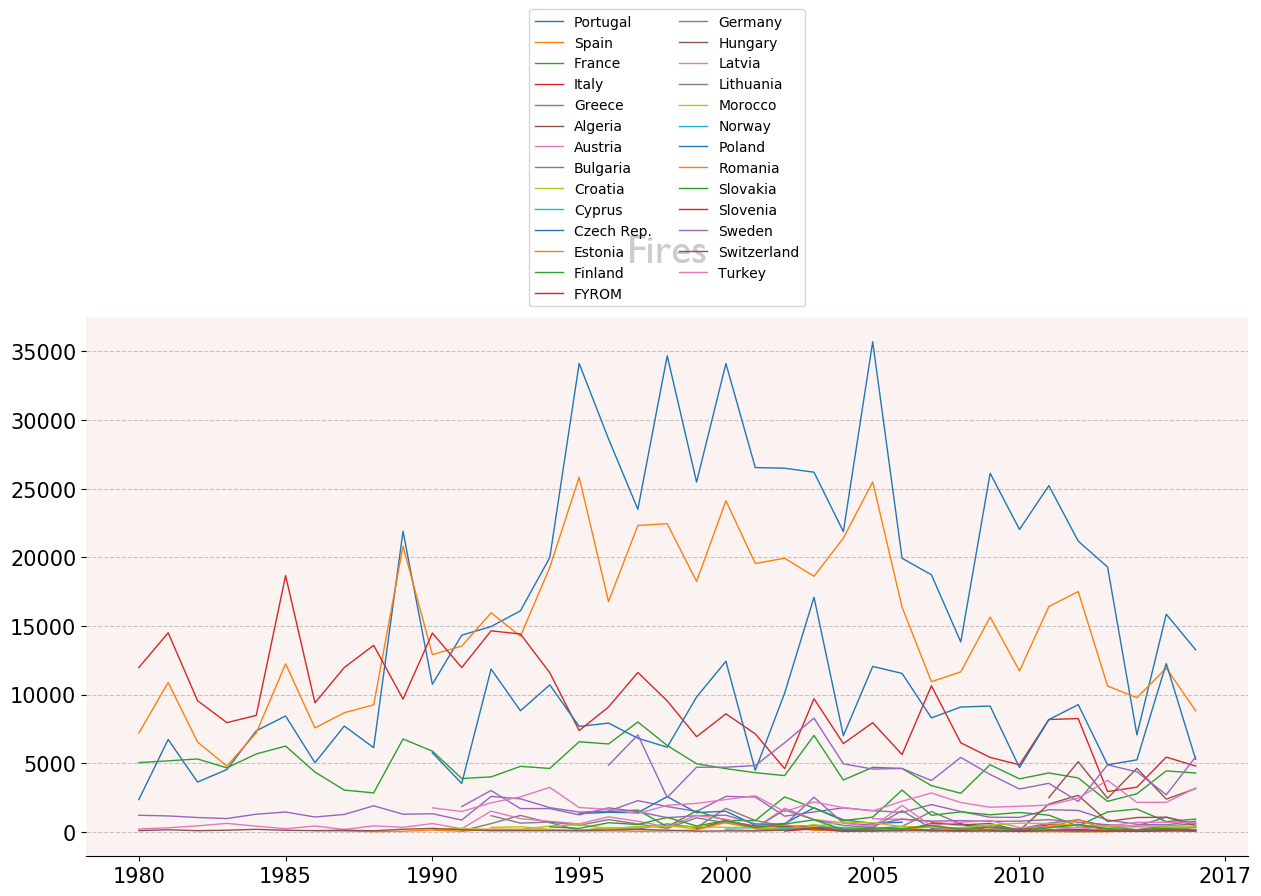

In [20]:
ax = fires_by_year.plot(kind='line', x='Year', figsize=(15,7), linewidth=1)

ax.set_title ('Fires', pad = 40)
ax.legend().set_visible(True)
ax.title.set_fontsize(30)
ax.title.set_fontname('Gill Sans MT')

ax.set_facecolor('#FBF2F2')

plt.xticks(size = 15)
plt.yticks(size = 15)

ax.set_xlabel("")

ax.set_xticks([1980, 1985, 1990, 1995, 2000, 2005, 2010, 2017])

#plt.gcf().text(0.5, 0.91, "Hectares burnt", ha='center', fontsize=15)

ax.grid(False, axis='y')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=8,
           ncol=2, mode="normal", borderaxespad=0.)

ax.grid(True, axis='y', color='black', linestyle='--', lw=0.8, alpha=0.2)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)

plt.show()

In [20]:
Port_fire_hist = fires_by_year['Portugal']

In [21]:
Spain_fire_hist = fires_by_year['Spain']

In [22]:
France_fire_hist = fires_by_year['France']

In [23]:
Italy_fire_hist = fires_by_year['Italy']

In [24]:
Greece_fire_hist = fires_by_year['Greece']

In [25]:
years = fires_by_year['Year']

In [26]:
all_fires  = pd.concat([years, Port_fire_hist, Spain_fire_hist, France_fire_hist, Italy_fire_hist, Greece_fire_hist], axis = 1, sort=True, ignore_index=True)

In [27]:
all_fires.head()

,0,1,2,3,4,5
0,1980,2349,7190,5040,11963,1207
1,1981,6730,10878,5173,14503,1159
2,1982,3626,6545,5308,9557,1045
3,1983,4539,4791,4659,7956,968
4,1984,7356,7203,5672,8482,1284


In [28]:
all_fires.rename(columns={0: 'Year',
                         1: 'Portugal',
                         2: 'Spain',
                         3: "France",
                         4: "Italy",
                         5: "Greece"},
                            inplace=True)

In [29]:
all_fires.head()

,Year,Portugal,Spain,France,Italy,Greece
0,1980,2349,7190,5040,11963,1207
1,1981,6730,10878,5173,14503,1159
2,1982,3626,6545,5308,9557,1045
3,1983,4539,4791,4659,7956,968
4,1984,7356,7203,5672,8482,1284


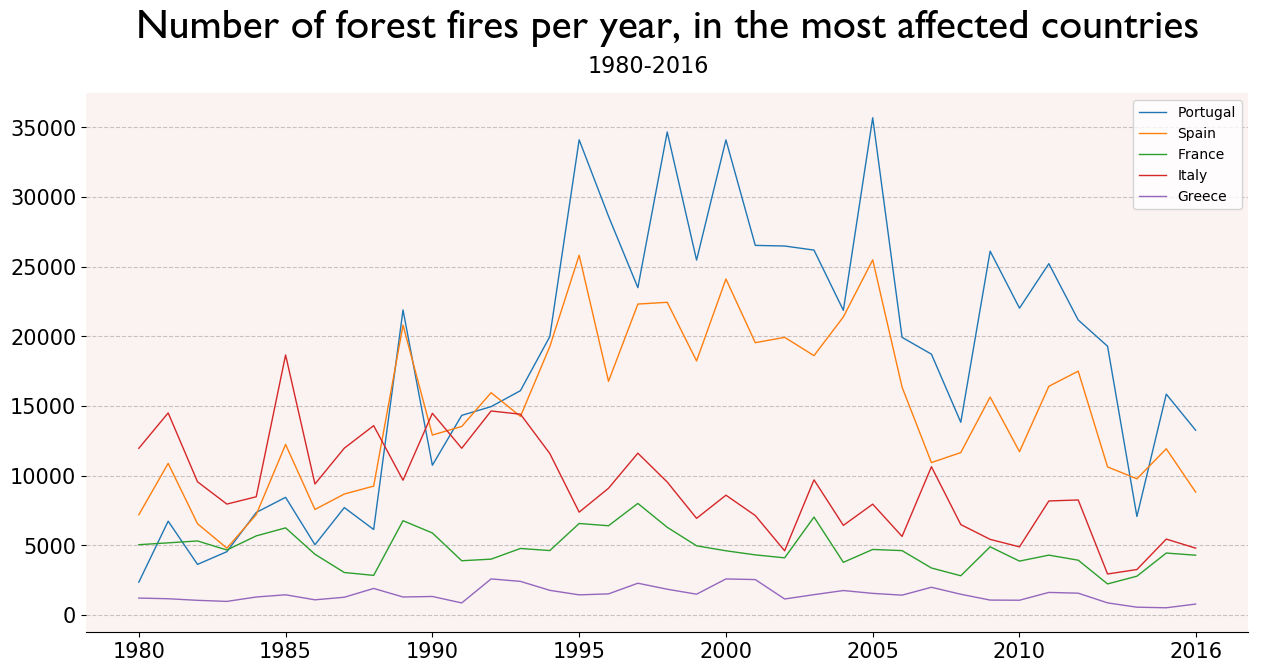

In [75]:
ax = all_fires.plot(kind='line', x='Year', figsize=(15,7), linewidth=1)

ax.set_title ('Number of forest fires per year, in the most affected countries', pad = 40)
ax.legend().set_visible(True)
ax.title.set_fontsize(30)
ax.title.set_fontname('Gill Sans MT')

ax.set_facecolor('#FBF2F2')

plt.xticks(size = 15)
plt.yticks(size = 15)

ax.set_xlabel("")



ax.set_xticks([1980, 1985, 1990, 1995, 2000, 2005, 2010, 2016])

plt.gcf().text(0.5, 0.91, "1980-2016", ha='center', fontsize=16)

ax.grid(False, axis='y')

#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#           ncol=1, mode="normal", borderaxespad=0.)

ax.grid(True, axis='y', color='black', linestyle='--', lw=0.8, alpha=0.2)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)

plt.savefig("graph-line-top-5-fires-per-year.pdf", bbox_inches='tight')
plt.show()

################DIRTY CODE-DO NOT PASS ##############

In [30]:
burnt_ha_by_year = pd.read_csv('forest_fires_3.csv')

In [31]:
greece_fires = burnt_ha_by_year['Greece']

In [32]:
years = burnt_ha_by_year['Burnt Area (ha) ']

In [33]:
greece_burnt  = pd.concat([years, greece_fires], axis = 1, sort=True, ignore_index=True)

In [34]:
greece_burnt.head()

,0,1
0,1980,32965.0
1,1981,81417.0
2,1982,27372.0
3,1983,19613.0
4,1984,33655.0


In [35]:
greece_burnt.rename(columns={0: 'Year', 
                             1: 'Fires',
                            }, 
                 inplace=True)

In [36]:
greece_burnt

,Year,Fires
0,1980,32965.00
1,1981,81417.00
2,1982,27372.00
3,1983,19613.00
4,1984,33655.00
5,1985,105450.00
6,1986,24514.00
7,1987,46315.00
8,1988,110501.00
9,1989,42363.00


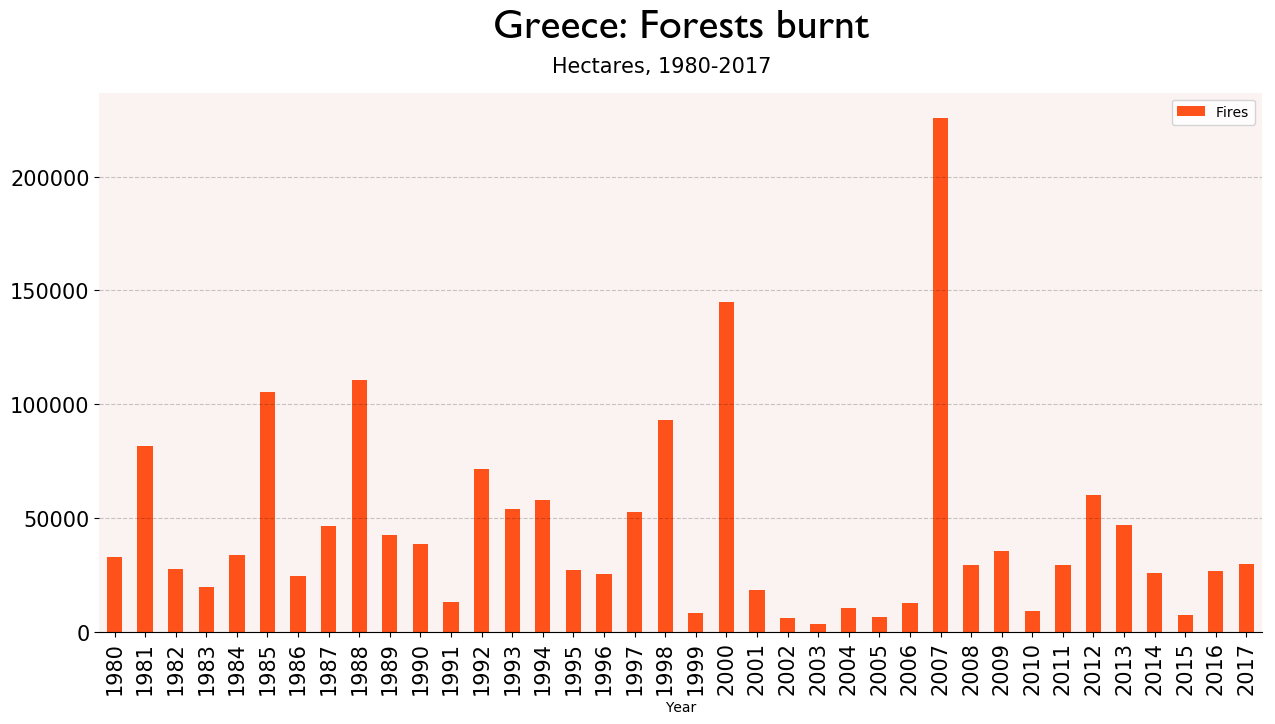

In [76]:
ax = greece_burnt.plot(kind = 'bar', x='Year', y='Fires', color='#FF521B', figsize=(15,7))


ax.set_title ('Greece: Forests burnt', pad = 40)
ax.legend().set_visible(True)
ax.title.set_fontsize(30)
ax.title.set_fontname('Gill Sans MT')

ax.set_facecolor('#FBF2F2')

plt.xticks(size = 15)
plt.yticks(size = 15)

#ax.set_xlabel("")

#ax.set_xticks([1980, 1985, 1990, 1995, 2000, 2005, 2010, 2016])

plt.gcf().text(0.5, 0.91, "Hectares, 1980-2017", ha='center', fontsize=15)

ax.grid(False, axis='y')

#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#           ncol=1, mode="normal", borderaxespad=0.)

ax.grid(True, axis='y', color='black', linestyle='--', lw=0.8, alpha=0.2)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)

plt.savefig("graph-bar-greece-burnt-hectares-per-year.pdf", bbox_inches='tight')
bbox_inches = 'tight'
plt.show()

In [37]:
forests_1990 = pd.read_csv('correct_forests_1990.csv')

In [38]:
forests_1990

,Countries,Forests
0,Belgium,677.40
1,Bulgaria,3327.00
2,Czech Republic,2629.42
3,Denmark,543.25
4,Germany (until 1990 former territory of the FRG),11300.00
5,Estonia,2205.90
6,Ireland,465.00
7,Greece,3299.00
8,Spain,13809.49
9,France,14436.00


In [39]:
forests_1990.dtypes

Countries     object
Forests      float64
dtype: object

In [40]:
# Forests are in thousand hectares
forests_1990.Forests = forests_1990.Forests * 1000

In [41]:
forests_1990

,Countries,Forests
0,Belgium,677400.0
1,Bulgaria,3327000.0
2,Czech Republic,2629420.0
3,Denmark,543250.0
4,Germany (until 1990 former territory of the FRG),11300000.0
5,Estonia,2205900.0
6,Ireland,465000.0
7,Greece,3299000.0
8,Spain,13809490.0
9,France,14436000.0


In [137]:
forests_1990.to_csv('forests_1990_corrected.csv')

In [119]:
forests_lost_total = pd.read_csv('forest_fires_3_2.csv')

In [120]:
forests_lost_total.dtypes

Burnt Area (ha)       int64
Portugal              int64
Spain                 int64
France                int64
Italy                 int64
Greece              float64
Algeria             float64
Austria             float64
Bulgaria            float64
Croatia             float64
Cyprus              float64
Czech Rep.          float64
Estonia             float64
Finland             float64
FYROM               float64
Germany             float64
Hungary             float64
Latvia              float64
Lithuania           float64
Morocco             float64
Norway              float64
Poland              float64
Romania             float64
Slovakia            float64
Slovenia            float64
Sweden              float64
Switzerland           int64
Turkey              float64
dtype: object

In [121]:
forests_lost_after_1990= forests_lost_total[forests_lost_total['Burnt Area (ha) '] >= 1990]

In [122]:
forests_lost_after_1990
#.reset_index(inplace=True)

,Burnt Area (ha),Portugal,Spain,France,Italy,Greece,Algeria,Austria,Bulgaria,Croatia,...,Lithuania,Morocco,Norway,Poland,Romania,Slovakia,Slovenia,Sweden,Switzerland,Turkey
10,1990,137252,203032,72625,195319,38594.00,NaN,NaN,NaN,NaN,...,NaN,2118.0,NaN,7341.0,444.0,NaN,NaN,NaN,1711,13742.0
11,1991,182486,260318,10130,99860,13046.00,NaN,NaN,511.0,NaN,...,NaN,3965.0,NaN,2567.0,277.0,NaN,NaN,NaN,96,8081.0
12,1992,57011,105277,16593,105692,71410.00,NaN,NaN,5243.0,11131.0,...,769.0,2579.0,NaN,43755.0,729.0,NaN,NaN,NaN,64,12232.0
13,1993,49963,89267,16698,203749,54049.00,NaN,NaN,18164.0,20157.0,...,274.0,3078.0,NaN,8290.0,518.0,NaN,NaN,NaN,37,15393.0
14,1994,77323,437635,24995,136334,57908.00,NaN,NaN,18100.0,7936.0,...,279.0,6072.0,NaN,9325.0,312.0,NaN,NaN,NaN,408,30828.0
15,1995,169612,143484,18137,48884,27202.00,NaN,NaN,550.0,4651.0,...,321.0,7018.0,NaN,5403.0,208.0,NaN,NaN,NaN,446,7676.0
16,1996,88867,59814,11400,57988,25310.00,NaN,NaN,906.0,11214.0,...,478.0,1185.0,NaN,14537.0,227.0,NaN,NaN,1588.0,292,14922.0
17,1997,30535,98503,21581,111230,52373.00,NaN,NaN,595.0,11122.0,...,226.0,3845.0,NaN,6766.0,68.0,NaN,NaN,5873.0,1872,6317.0
18,1998,158369,133643,19282,155553,92901.00,NaN,NaN,6967.0,32056.0,...,93.0,1855.0,NaN,4222.0,137.0,NaN,NaN,422.0,274,6764.0
19,1999,70613,82217,15906,71117,8289.00,NaN,NaN,8291.0,6053.0,...,494.0,1688.0,NaN,8629.0,379.0,557.0,NaN,1771.0,30,5804.0


In [123]:
forests_lost_after_1990.loc[38] = forests_lost_after_1990.sum()

C:\Users\ilias\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [124]:
forests_lost_after_1990

,Burnt Area (ha),Portugal,Spain,France,Italy,Greece,Algeria,Austria,Bulgaria,Croatia,...,Lithuania,Morocco,Norway,Poland,Romania,Slovakia,Slovenia,Sweden,Switzerland,Turkey
10,1990.0,137252.0,203032.0,72625.0,195319.0,38594.00,NaN,NaN,NaN,NaN,...,NaN,2118.0,NaN,7341.0,444.0,NaN,NaN,NaN,1711.0,13742.0
11,1991.0,182486.0,260318.0,10130.0,99860.0,13046.00,NaN,NaN,511.0,NaN,...,NaN,3965.0,NaN,2567.0,277.0,NaN,NaN,NaN,96.0,8081.0
12,1992.0,57011.0,105277.0,16593.0,105692.0,71410.00,NaN,NaN,5243.0,11131.0,...,769.0,2579.0,NaN,43755.0,729.0,NaN,NaN,NaN,64.0,12232.0
13,1993.0,49963.0,89267.0,16698.0,203749.0,54049.00,NaN,NaN,18164.0,20157.0,...,274.0,3078.0,NaN,8290.0,518.0,NaN,NaN,NaN,37.0,15393.0
14,1994.0,77323.0,437635.0,24995.0,136334.0,57908.00,NaN,NaN,18100.0,7936.0,...,279.0,6072.0,NaN,9325.0,312.0,NaN,NaN,NaN,408.0,30828.0
15,1995.0,169612.0,143484.0,18137.0,48884.0,27202.00,NaN,NaN,550.0,4651.0,...,321.0,7018.0,NaN,5403.0,208.0,NaN,NaN,NaN,446.0,7676.0
16,1996.0,88867.0,59814.0,11400.0,57988.0,25310.00,NaN,NaN,906.0,11214.0,...,478.0,1185.0,NaN,14537.0,227.0,NaN,NaN,1588.0,292.0,14922.0
17,1997.0,30535.0,98503.0,21581.0,111230.0,52373.00,NaN,NaN,595.0,11122.0,...,226.0,3845.0,NaN,6766.0,68.0,NaN,NaN,5873.0,1872.0,6317.0
18,1998.0,158369.0,133643.0,19282.0,155553.0,92901.00,NaN,NaN,6967.0,32056.0,...,93.0,1855.0,NaN,4222.0,137.0,NaN,NaN,422.0,274.0,6764.0
19,1999.0,70613.0,82217.0,15906.0,71117.0,8289.00,NaN,NaN,8291.0,6053.0,...,494.0,1688.0,NaN,8629.0,379.0,557.0,NaN,1771.0,30.0,5804.0


In [129]:
forest_sum = forests_lost_after_1990.drop(forests_lost_after_1990.index[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]], axis=0)

In [136]:
forest_sum.to_csv('forest_sum.csv', index=False)

In [49]:
forests_burned_after_1990

,0
Year,112196.00
Portugal,7399814.00
Spain,7086522.00
France,1041486.00
Italy,4857000.00
Greece,2275302.50
Algeria,401110.00
Austria,2852.00
Bulgaria,492223.80
Croatia,644654.00


In [50]:
forests_burned_after_1990.drop('Year', inplace=True)

In [51]:
forests_burned_after_1990.drop('Algeria', inplace=True)
forests_burned_after_1990.drop('FYROM', inplace=True)
forests_burned_after_1990.drop('Morocco', inplace=True)
forests_burned_after_1990.drop('Turkey', inplace=True)

In [52]:
forests_burned_after_1990

,0
Portugal,7399814.00
Spain,7086522.00
France,1041486.00
Italy,4857000.00
Greece,2275302.50
Austria,2852.00
Bulgaria,492223.80
Croatia,644654.00
Cyprus,85752.00
Czech Rep.,13528.00


In [53]:
forests_burned_after_1990.rename(columns={'index': 'Country',
                          0: 'Forest',
                          }, 
                 inplace=True)

In [54]:
forests_burned_after_1990

,Forest
Portugal,7399814.00
Spain,7086522.00
France,1041486.00
Italy,4857000.00
Greece,2275302.50
Austria,2852.00
Bulgaria,492223.80
Croatia,644654.00
Cyprus,85752.00
Czech Rep.,13528.00


In [178]:
relative_forest_loss = pd.read_csv('concat_forests.csv')

In [179]:
relative_forest_loss.head()

,Countries,Burnt_ha,nineties_forests
0,Portugal,3699907.00,3436190
1,Spain,3664241.00,13809490
2,France,563412.00,14436000
3,Italy,2541753.00,7590000
4,Greece,1167347.25,3299000


In [180]:
relative_forest_loss['perc_burnt'] = round((relative_forest_loss.Burnt_ha / relative_forest_loss.nineties_forests) * 100, 1)

In [181]:
relative_forest_loss.sort_values('perc_burnt', ascending=False, inplace=True)

In [182]:
relative_forest_loss.head()

,Countries,Burnt_ha,nineties_forests,perc_burnt
0,Portugal,3699907.00,3436190,107.7
4,Greece,1167347.25,3299000,35.4
3,Italy,2541753.00,7590000,33.5
8,Cyprus,42876.00,161110,26.6
1,Spain,3664241.00,13809490,26.5


In [270]:
relative_forest_loss['perc_left'] = 100 - relative_forest_loss['perc_burnt']  

In [271]:
relative_forest_loss.head()

,Countries,Burnt_ha,nineties_forests,perc_burnt,perc_left
0,Portugal,3699907.00,3436190,107.7,-7.7
4,Greece,1167347.25,3299000,35.4,64.6
3,Italy,2541753.00,7590000,33.5,66.5
8,Cyprus,42876.00,161110,26.6,73.4
1,Spain,3664241.00,13809490,26.5,73.5


In [183]:
from pywaffle import Waffle

'FontAwesome.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
C:\Users\ilias\AppData\Local\Programs\Python\Python36-32\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
'FontAwesome.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


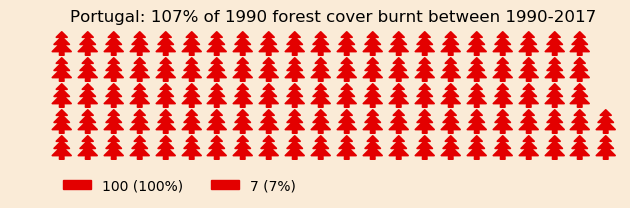

In [264]:
data = {'Forests burnt': 100, 'Forests burnt_1': 7}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    colors=('#E30000', '#E30000'),
    title={'label': 'Portugal: 107% of 1990 forest cover burnt between 1990-2017', 'loc': 'center'},
    labels=["{1} ({1}%)".format(k, v) for k, v in data.items()],
    icons='tree', icon_size=18,
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
)
fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#faebd7')

plt.savefig("Port_box_tree.pdf", bbox_inches='tight')
bbox_inches = 'tight'
plt.show()

plt.show()

'FontAwesome.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
C:\Users\ilias\AppData\Local\Programs\Python\Python36-32\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
'FontAwesome.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


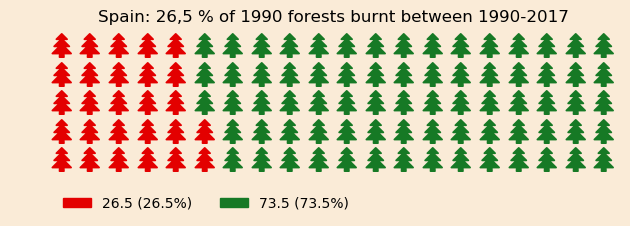

In [266]:
data = {'Forests lost': 26.5, 'Forests standing': 73.5}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    colors=('#E30000', '#167925'),
    title={'label': 'Spain: 26,5 % of 1990 forests burnt between 1990-2017', 'loc': 'center'},
    labels=["{1} ({1}%)".format(k, v) for k, v in data.items()],
    icons='tree', icon_size=18,
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
)
fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#faebd7')

plt.savefig("Port_box_tree.pdf", bbox_inches='tight')
bbox_inches = 'tight'
plt.show()

plt.show()

'FontAwesome.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
C:\Users\ilias\AppData\Local\Programs\Python\Python36-32\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
'FontAwesome.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


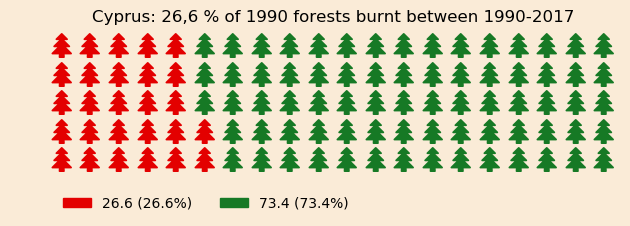

In [267]:
data = {'Percentage of forests burnt between 1990-2017, bases on 1990 forest cover': 26.6, 'additional': 73.4}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    colors=('#E30000', '#167925'),
    title={'label': 'Cyprus: 26,6 % of 1990 forests burnt between 1990-2017', 'loc': 'center'},
    labels=["{1} ({1}%)".format(k, v) for k, v in data.items()],
    icons='tree', icon_size=18,
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
)
fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#faebd7')

plt.savefig("Port_box_tree.pdf", bbox_inches='tight')
bbox_inches = 'tight'
plt.show()

plt.show()

C:\Users\ilias\AppData\Local\Programs\Python\Python36-32\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


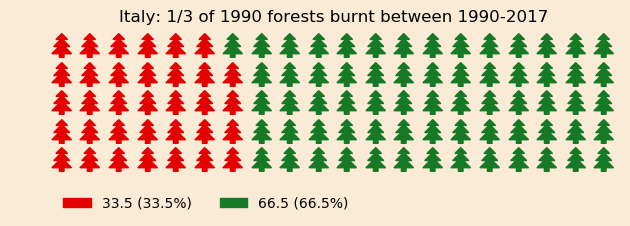

In [268]:
data = {'Forests lost': 33.5, 'Forests standing': 66.5}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    colors=('#E30000', '#167925'),
    title={'label': 'Italy: 1/3 of 1990 forests burnt between 1990-2017', 'loc': 'center'},
    labels=["{1} ({1}%)".format(k, v) for k, v in data.items()],
    icons='tree', icon_size=18,
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
)
fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#faebd7')

plt.show()

C:\Users\ilias\AppData\Local\Programs\Python\Python36-32\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


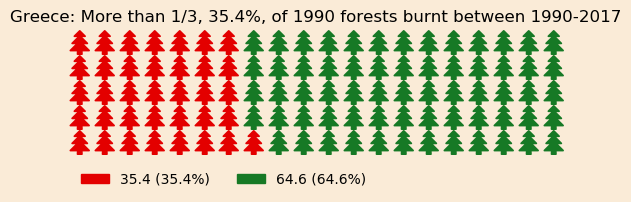

In [273]:
data = {'Forests lost': 35.4, 'Forests standing': 64.6}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    colors=('#E30000', '#167925'),
    title={'label': 'Greece: More than 1/3, 35.4%, of 1990 forests burnt between 1990-2017', 'loc': 'center'},
    labels=["{1} ({1}%)".format(k, v) for k, v in data.items()],
    icons='tree', icon_size=18,
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
)
fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#faebd7')

plt.show()

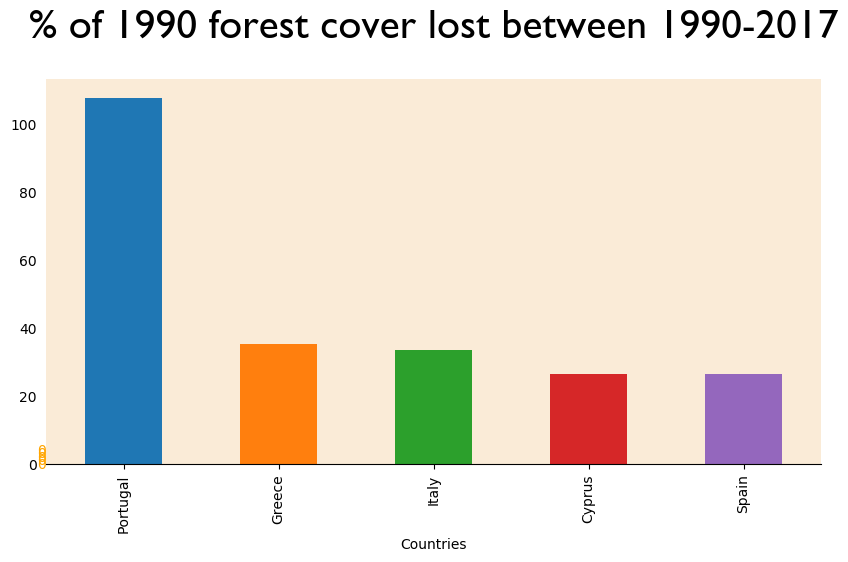

In [277]:
ax = relative_forest_loss.sort_values(by="perc_burnt", ascending=False).head(5).plot(x='Countries', y='perc_burnt', kind='bar', figsize=(10,5), legend=False)

for i, bar in enumerate(ax.patches):
    # print(i)
    value = str(int(round(bar.get_width())))
    x_pos = bar.get_width() - 1
    y_pos = i
    # ax.text(x_pos, y_pos, value, verticalalignment='center')
    ax.text(x_pos, y_pos, value, va='center', ha='right', color='orange')

ax.set_title ('% of 1990 forest cover lost between 1990-2017', pad = 30)
ax.legend().set_visible(False)
ax.title.set_fontsize(30)
ax.title.set_fontname('Gill Sans MT')

#plt.gcf().text(0.5, 0.92, "Hectares burnt, by country", ha='center', fontsize=15)


ax.tick_params(which='major', left=False, bottom=False)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)

ax.tick_params(which='major', left=False, bottom=True, grid_alpha=0.5)
ax.set_facecolor('#faebd7')

ax.set_axisbelow(False)
#ax.set_xlim(0, 10)
ax.yaxis.label.set_visible(False)


#plt.savefig("graph-bar-5-largest_areas_burnt.pdf", bbox_inches='tight')
plt.show()